# Tamer Kanak - 201805069

**Importing Dataset**


In [1]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv("tabularData.csv", delimiter=";")

**Remove duplicate lines and reset index**


In [2]:
data.drop_duplicates(inplace=True)
data.reset_index(drop=True,inplace=True)

In [3]:
data.head()

,Harf,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Y12,Y13,Y14,Y15,Y16,Y17,Y18,Y19,Y20,Y21
0,a,97,144,184,198,192,157,163,156,152,...,101,133,92,63,108,139,99,70,98,121
1,a,109,142,173,177,160,155,148,147,151,...,119,121,108,91,126,129,115,104,128,133
2,a,119,143,156,158,164,135,147,146,142,...,133,147,108,119,136,148,115,120,133,142
3,a,116,137,150,154,163,139,143,142,139,...,117,133,112,103,124,138,117,106,119,130
4,a,121,158,188,196,188,153,161,166,167,...,120,144,103,87,129,151,117,102,130,147


**Label encoding for target column**


In [4]:
from sklearn.preprocessing import LabelEncoder

# Separate independent variables (X) and target variable (y)
label_encoder = LabelEncoder()
data['Harf'] = label_encoder.fit_transform(data['Harf'])
y = data['Harf']

In [5]:
data.head()

,Harf,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Y12,Y13,Y14,Y15,Y16,Y17,Y18,Y19,Y20,Y21
0,0,97,144,184,198,192,157,163,156,152,...,101,133,92,63,108,139,99,70,98,121
1,0,109,142,173,177,160,155,148,147,151,...,119,121,108,91,126,129,115,104,128,133
2,0,119,143,156,158,164,135,147,146,142,...,133,147,108,119,136,148,115,120,133,142
3,0,116,137,150,154,163,139,143,142,139,...,117,133,112,103,124,138,117,106,119,130
4,0,121,158,188,196,188,153,161,166,167,...,120,144,103,87,129,151,117,102,130,147


**\# 0 \-&gt; a** 

**\# 1 \-&gt; b** 

**\# 2 \-&gt; c** 

**\# 3 \-&gt; d** 

**\# 4 \-&gt; e** 

**\# 5 \-&gt; f** 

**\# 6 \-&gt; g**

**\# 7 \-&gt; h** 

**\# 8 \-&gt; i** 

**\# 9 \-&gt; j** 

**\# 10 \-&gt; k** 

**\# 11 \-&gt; l** 

**\# 12 \-&gt; m** 

**\# 13 \-&gt; n** 

**\# 14 \-&gt; o**

**\# 15 \-&gt; p** 

**\# 16 \-&gt; q** 

**\# 17 \-&gt; r** 

**\# 18 \-&gt; s**

**\# 19 \-&gt; t** 

**\# 20 \-&gt; u** 

**\# 21 \-&gt; v** 

**\# 22 \-&gt; w** 

**\# 23 \-&gt; x** 

**\# 24 \-&gt; y** 

**\# 25 \-&gt; z** 


**A function written to calculate the angle of the finger's upright position based on the three points of a finger**


In [6]:
# Define functions
def calculate_angle(x1, y1, x2, y2, x3, y3):
    """
    Calculates the angle between vectors formed by three given points.

    Args:
    x1, y1: x and y coordinates of the first point.
    x2, y2: x and y coordinates of the second point.
    x3, y3: x and y coordinates of the third point.

    Returns:
    angle: Angle between the two vectors (in degrees).
    """
    # Define the two vectors
    v1 = np.array([x1 - x3, y1 - y3])
    v2 = np.array([x2 - x3, y2 - y3])

    # Calculate dot product
    dot_product = np.dot(v1, v2)

    # Calculate lengths of the vectors
    v1_length = np.linalg.norm(v1)
    v2_length = np.linalg.norm(v2)

    # Calculate cosine value
    cos_theta = dot_product / (v1_length * v2_length)

    # Calculate angle in radians
    theta_radian = np.arccos(cos_theta)

    # Convert angle to degrees
    angle = np.degrees(theta_radian)

    return angle

**Function to measure the distance between the end point and the root point of a finger to distinguish whether the finger is closed or open** 


In [7]:
def closedFinCounter(y9,y6,y13,y10,y17,y14,y21,y18):
    
    counter = 0

    if (y6 > y9):
        counter += 1
    if (y10 > y13):
        counter += 1
    if (y14 > y17):
        counter += 1
    if (y18 > y21):
        counter += 1
    else:
        return counter
    return counter

**Function written to measure the angle between the endpoints of 5 fingers**


In [8]:
def finger_angles(x1, y1, x2, y2, x3, y3, x4, y4, x5, y5):
  """
    Calculates the angles between fingers.

    Parameters:
    x1: x value of the thumb tip.
    y1: y value of the thumb tip.
    x2: x value of the index finger tip.
    y2: y value of the index finger tip.
    x3: x value of the middle finger tip.
    y3: y value of the middle finger tip.
    x4: x value of the ring finger tip.
    y4: y value of the ring finger tip.
    x5: x value of the pinky finger tip.
    y5: y value of the pinky finger tip.

    Returns:
    Finger angles (in degrees).
    """

  # Transform coordinates
  x2_t = x2 - x1
  y2_t = y2 - y1
  x3_t = x3 - x1
  y3_t = y3 - y1
  x4_t = x4 - x1
  y4_t = y4 - y1
  x5_t = x5 - x1
  y5_t = y5 - y1

  # Calculate angles
  angle12 = np.arctan2(y2_t, x2_t)
  angle13 = np.arctan2(y3_t, x3_t)
  angle14 = np.arctan2(y4_t, x4_t)
  angle15 = np.arctan2(y5_t, x5_t)

  # Convert angles from radians to degrees
  angles_deg  = np.rad2deg([angle12, angle13, angle14, angle15])

  return angles_deg 

**Function to measure the distance between two points**


In [9]:
def calculate_distance(x1, y1, x2, y2):
    # Calculate distance between fingertip and base point
    return ((x1 - x2)**2 + (y1 - y2)**2)**0.5

**Variable definitions for angles, lengths and counters**


In [10]:
thumb_finger_angle = []
index_finger_angle = []
middle_finger_angle = []
ring_finger_angle = []
pinky_finger_angle = []

thumb_finger_length = []
index_finger_length = []
middle_finger_length = []
ring_finger_length = []
pinky_finger_length = []

num_of_closed_fingers = []
angles = []

**Calculation of the right angle of 5 fingers, calculation of the distance between the tip and root points of 5 fingers, determination of open/closed fingers**


In [11]:
for i in range(len(data)):
    thumb_angle = calculate_angle(data["X5"][i],data["Y5"][i], data["X3"][i],data["Y3"][i], data["X4"][i],data["Y4"][i])
    thumb_distance = calculate_distance(data["X5"][i],data["Y5"][i], data["X3"][i],data["Y3"][i])
    
    index_angle = calculate_angle(data["X9"][i],data["Y9"][i], data["X6"][i],data["Y6"][i], data["X7"][i],data["Y7"][i])
    index_distance = calculate_distance(data["X9"][i],data["Y9"][i], data["X6"][i],data["Y6"][i])

    middle_angle = calculate_angle(data["X13"][i],data["Y13"][i], data["X10"][i],data["Y10"][i], data["X11"][i],data["Y11"][i])
    middle_distance = calculate_distance(data["X13"][i],data["Y13"][i], data["X10"][i],data["Y10"][i])

    ring_angle = calculate_angle(data["X17"][i],data["Y17"][i], data["X14"][i],data["Y14"][i], data["X15"][i],data["Y15"][i])
    ring_distance = calculate_distance(data["X17"][i],data["Y17"][i], data["X14"][i],data["Y14"][i])

    pinky_angle = calculate_angle(data["X21"][i],data["Y21"][i], data["X18"][i],data["Y18"][i], data["X19"][i],data["Y19"][i])
    pinky_distance = calculate_distance(data["X21"][i],data["Y21"][i], data["X18"][i],data["Y18"][i])
    
    closedCounter = closedFinCounter(data["Y9"][i], data["Y6"][i], data["Y13"][i], data["Y10"][i], data["Y17"][i], data["Y14"][i], data["Y21"][i], data["Y18"][i])
    angle = finger_angles(data["X5"][i],data["Y5"][i], data["X9"][i],data["Y9"][i], data["X13"][i],data["Y13"][i], data["X17"][i],data["Y17"][i], data["X21"][i],data["Y21"][i])

    thumb_finger_angle.append(thumb_angle)
    index_finger_angle.append(index_angle)
    middle_finger_angle.append(middle_angle)
    ring_finger_angle.append(ring_angle)
    pinky_finger_angle.append(pinky_angle)
    angles.append(angle)
    
    thumb_finger_length.append(thumb_distance)
    index_finger_length.append(index_distance)
    middle_finger_length.append(middle_distance)
    ring_finger_length.append(ring_distance)
    pinky_finger_length.append(pinky_distance)
    
    num_of_closed_fingers.append(closedCounter)

c:\users\tamer\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in arccos


**Converting calculated angles and lengths to dataframe**


In [12]:
thumb_finger_angle = pd.DataFrame(thumb_finger_angle, columns=["thumb_finger_angle"])
index_finger_angle = pd.DataFrame(index_finger_angle, columns=["index_finger_angle"])
middle_finger_angle = pd.DataFrame(middle_finger_angle, columns=["middle_finger_angle"])
ring_finger_angle = pd.DataFrame(ring_finger_angle, columns=["ring_finger_angle"])
pinky_finger_angle = pd.DataFrame(pinky_finger_angle, columns=["pinky_finger_angle"])

thumb_finger_length = pd.DataFrame(thumb_finger_length, columns=["thumb_finger_length"])
index_finger_length = pd.DataFrame(index_finger_length, columns=["index_finger_length"])
middle_finger_length = pd.DataFrame(middle_finger_length, columns=["middle_finger_length"])
ring_finger_length = pd.DataFrame(ring_finger_length, columns=["ring_finger_length"])
pinky_finger_length = pd.DataFrame(pinky_finger_length, columns=["pinky_finger_length"])

**Assignment of angles between fingers**


In [13]:
thumb_index = []
index_middle = []
middle_ring = []
ring_pinky = []

for i in range(len(data)):
    thumb_index.append(angles[i][0])
    index_middle.append(angles[i][1])
    middle_ring.append(angles[i][2])
    ring_pinky.append(angles[i][3])

**Converting the required features to dataframe**


In [14]:
# Create DataFrames for finger angles    
num_of_closed_fingers = pd.DataFrame(num_of_closed_fingers, columns=["num_of_closed_fingers"])
thumb_index_angle = pd.DataFrame(thumb_index, columns=["thumb_index_angle"])
index_middle_angle = pd.DataFrame(index_middle, columns=["index_middle_angle"])
middle_ring_angle = pd.DataFrame(middle_ring, columns=["middle_ring_angle"])
ring_pinky_angle = pd.DataFrame(ring_pinky, columns=["ring_pinky_angle"])

**Making feature extraction processes into actual data**


In [15]:
df = pd.concat([data[['Harf','X1','Y1']],thumb_finger_angle,thumb_finger_length,index_finger_angle, index_finger_length, middle_finger_angle, middle_finger_length, ring_finger_angle, ring_finger_length, pinky_finger_angle, pinky_finger_length, thumb_index_angle, index_middle_angle, middle_ring_angle, ring_pinky_angle, num_of_closed_fingers],axis=1)


In [16]:
df.head()

,Harf,X1,Y1,thumb_finger_angle,thumb_finger_length,index_finger_angle,index_finger_length,middle_finger_angle,middle_finger_length,ring_finger_angle,ring_finger_length,pinky_finger_angle,pinky_finger_length,thumb_index_angle,index_middle_angle,middle_ring_angle,ring_pinky_angle,num_of_closed_fingers
0,0,97,197,153.138849,81.394103,0.558965,30.413813,4.851613,43.000000,10.420130,47.853944,26.810954,29.068884,120.101305,129.946174,136.301953,149.184294,0
1,0,109,185,135.298413,62.369865,11.457330,16.492423,1.556567,19.924859,0.553947,22.135944,5.786221,20.591260,103.324531,119.604451,132.108730,140.527540,0
2,0,119,167,165.154548,36.878178,103.157543,35.693137,118.626451,44.147480,130.132161,42.720019,132.602971,33.600595,114.623565,121.263732,127.030390,134.432734,0
3,0,116,164,158.574706,36.400549,8.593017,17.000000,19.525807,25.179357,35.574406,27.513633,40.378749,17.029386,126.869898,131.284711,134.370401,146.768289,0
4,0,121,203,155.332065,74.000000,26.381998,43.324358,39.654381,55.154329,50.575850,54.589376,64.573126,43.139309,106.049005,116.306964,125.706691,135.616060,0


**Drop rows with missing values**


In [17]:
df.dropna(inplace=True)

**Reset index**


In [18]:
df.reset_index(drop=True,inplace=True)

**Converting negative angles to absolute angles**


In [19]:
df = df.abs()

**Visualisation of Correlation Matrix**


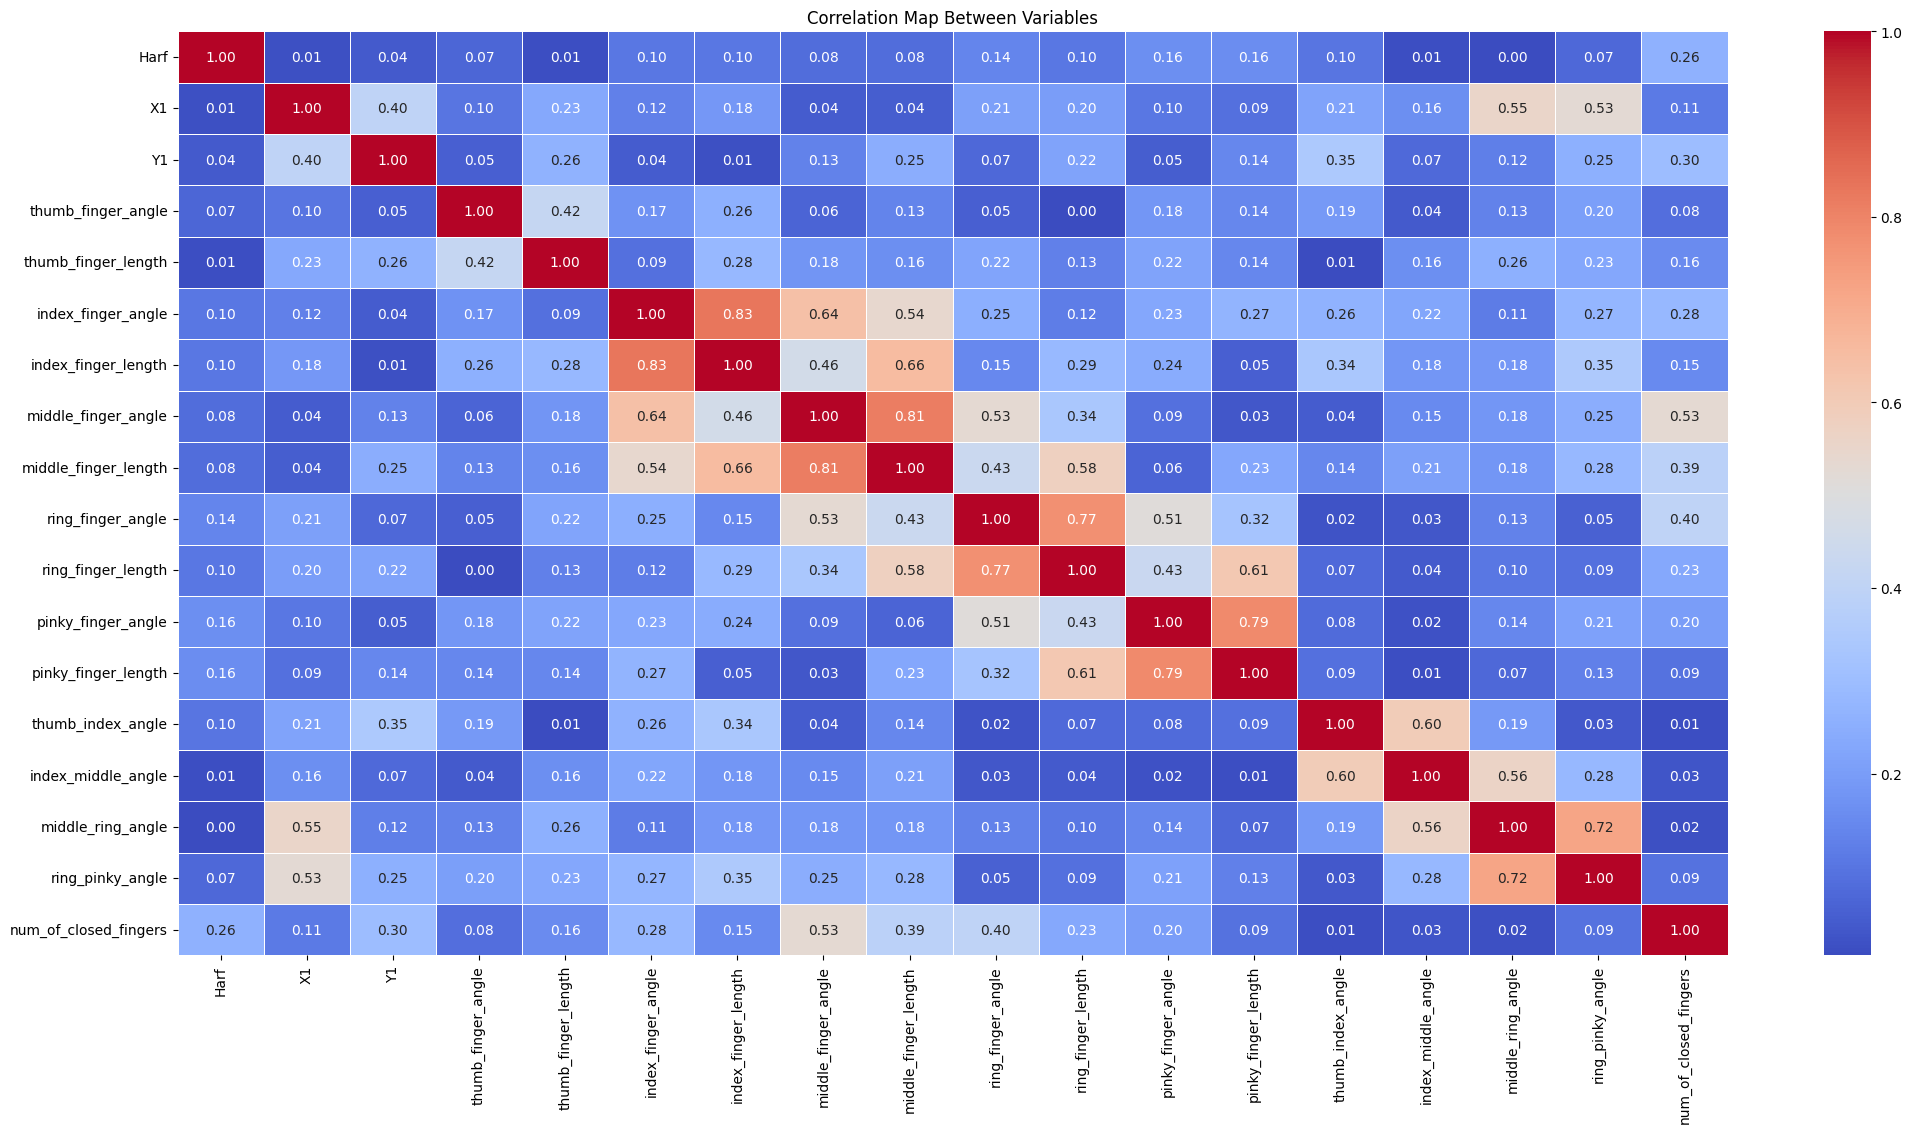

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr().abs()
plt.figure(figsize=(25, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Map Between Variables')
plt.show()

**Creates a bar graph showing the average number of closed fingers categorised by letter**


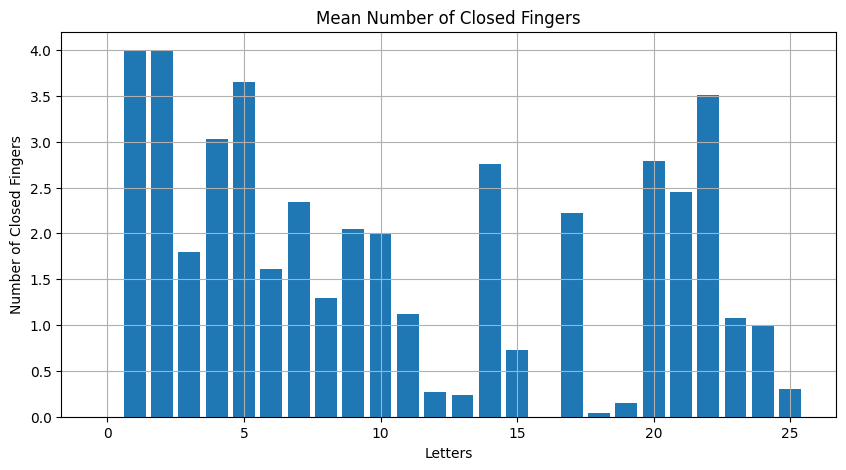

In [21]:
meanClosedFingers = df.groupby('Harf')['num_of_closed_fingers'].mean()

plt.figure(figsize=(10, 5))
plt.bar(meanClosedFingers.index, meanClosedFingers.values)
plt.title('Mean Number of Closed Fingers')
plt.xlabel('Letters')
plt.ylabel('Number of Closed Fingers')
plt.grid(True)
plt.show()

**Visualisation made to see the relationships between the upright posture angles of the fingers and the tip\-root distances of the fingers**


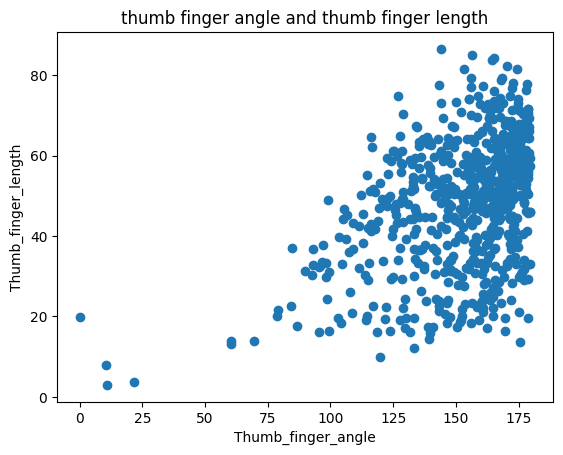

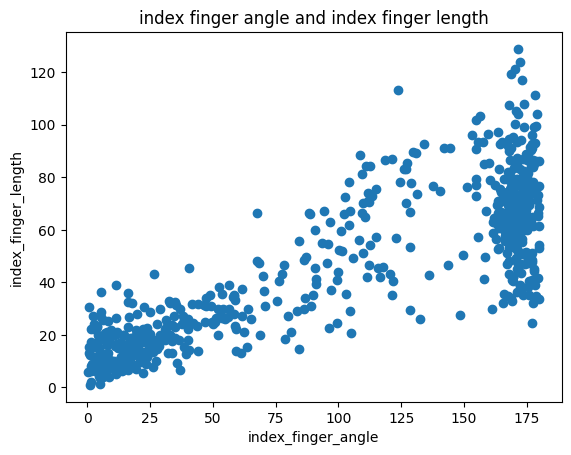

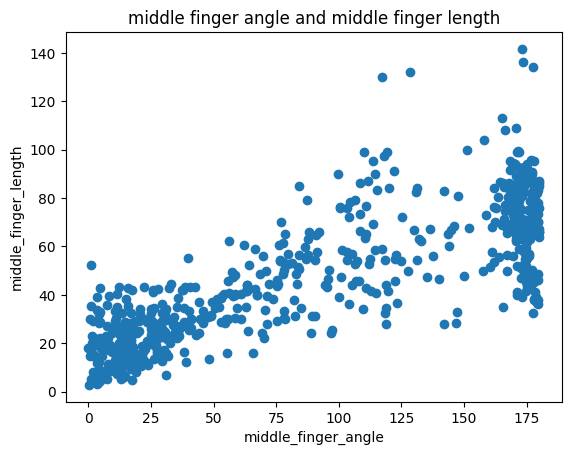

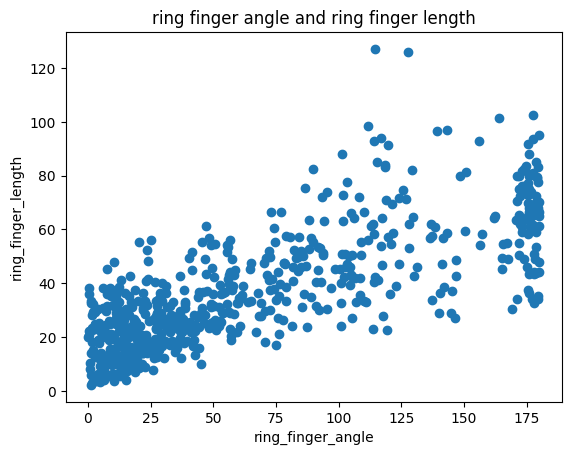

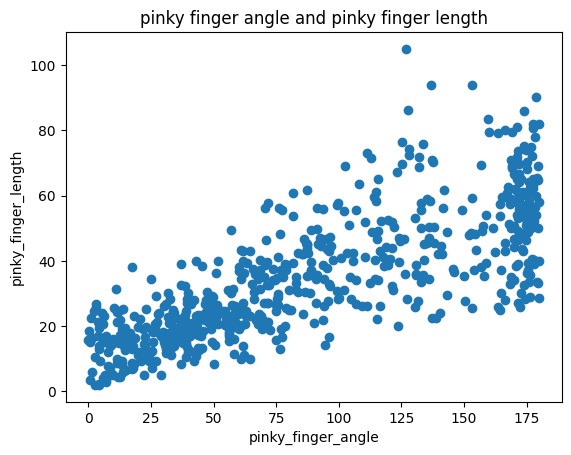

In [22]:
plt.scatter(df.thumb_finger_angle, df.thumb_finger_length)
plt.xlabel("Thumb_finger_angle")
plt.ylabel("Thumb_finger_length")
plt.title("thumb finger angle and thumb finger length")
plt.show()

plt.scatter(df.index_finger_angle, df.index_finger_length)
plt.xlabel("index_finger_angle")
plt.ylabel("index_finger_length")
plt.title("index finger angle and index finger length")
plt.show()

plt.scatter(df.middle_finger_angle, df.middle_finger_length)
plt.xlabel("middle_finger_angle")
plt.ylabel("middle_finger_length")
plt.title("middle finger angle and middle finger length")
plt.show()

plt.scatter(df.ring_finger_angle, df.ring_finger_length)
plt.xlabel("ring_finger_angle")
plt.ylabel("ring_finger_length")
plt.title("ring finger angle and ring finger length")
plt.show()

plt.scatter(df.pinky_finger_angle, df.pinky_finger_length)
plt.xlabel("pinky_finger_angle")
plt.ylabel("pinky_finger_length")
plt.title("pinky finger angle and pinky finger length")
plt.show()

**Visualisation of the average of the spacing between the 5 fingers**


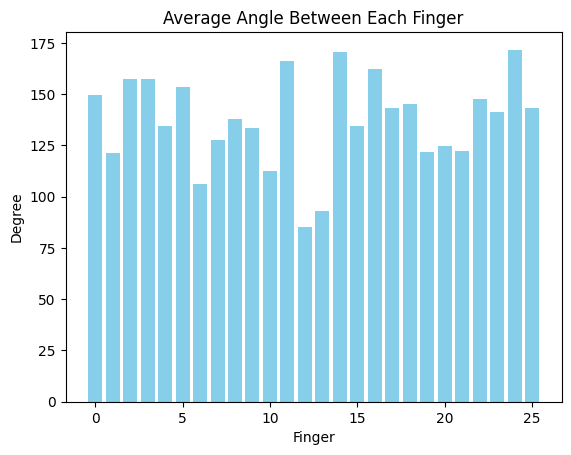

In [23]:
avgDegreeBtweenFingers = df['thumb_index_angle'] + df['index_middle_angle'] + df['middle_ring_angle'] + df['ring_pinky_angle']
avgDegreeBtweenFingers = avgDegreeBtweenFingers/ 4

# Average angle between each finger
fig, ax = plt.subplots()
ax.bar(df.Harf, avgDegreeBtweenFingers, color='skyblue')
ax.set_xlabel('Finger')
ax.set_ylabel('Degree')
ax.set_title('Average Angle Between Each Finger')
plt.show()

**Separate features and target variable**


In [24]:
X = df.drop(columns=['Harf'], axis=1)
y = df['Harf']

**Train Test Split**


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

**Standard Scaling**


In [26]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Installing the required algorithm**

In [27]:
!pip install xgboost

**Importing the necessary classification algorithms**


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Defining classification algorithms
classifiers = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Neural Network": MLPClassifier(),
    "AdaBoost": AdaBoostClassifier(algorithm="SAMME"),
    "XGBClassifier": XGBClassifier()
}

**Code to avoid some unnecessary warnings**


In [29]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning, ConvergenceWarning

# Ignore warnings
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

**Model training with Cross Validation and measurement of success metrics**


In [30]:
# Training each classification algorithm, making predictions and calculating accuracy values
for name, classifier in classifiers.items():
    
    classifier.fit(X_train, y_train)

    # Make predictions on both training and testing sets
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)

    # Calculate R-squared scores for both training and testing sets
    train_r2 = accuracy_score(y_train, y_train_pred)
    test_r2 = accuracy_score(y_test, y_test_pred)

    # Print the model name, train R-squared, and test R-squared scores
    print(f"{name.upper()}:")
    print(f"Train Accuracy: {train_r2:.6f}")
    print(f"Test Accuracy: {test_r2:.6f}\n")
    
    scores = cross_validate(classifier, X_train, y_train,
                        scoring=['precision_macro','recall_macro','f1_macro','accuracy'], 
                        cv=10,
                        return_train_score=True)
    scores = pd.DataFrame(scores, index = range(1,11))
    
    print(name.upper())
    print(scores.iloc[:, 2:].mean().apply("{:.6f}".format))  
    print("_______________________________________________________________________")  

K-NEAREST NEIGHBORS:
Train Accuracy: 0.865019
Test Accuracy: 0.765152

K-NEAREST NEIGHBORS
test_precision_macro     0.754615
train_precision_macro    0.870881
test_recall_macro        0.755128
train_recall_macro       0.858599
test_f1_macro            0.731822
train_f1_macro           0.859948
test_accuracy            0.749129
train_accuracy           0.856569
dtype: object
_______________________________________________________________________
DECISION TREE:
Train Accuracy: 1.000000
Test Accuracy: 0.734848

DECISION TREE
test_precision_macro     0.728974
train_precision_macro    1.000000
test_recall_macro        0.741026
train_recall_macro       1.000000
test_f1_macro            0.712518
train_f1_macro           1.000000
test_accuracy            0.749238
train_accuracy           1.000000
dtype: object
_______________________________________________________________________
RANDOM FOREST:
Train Accuracy: 1.000000
Test Accuracy: 0.818182

RANDOM FOREST
test_precision_macro     0.850192
t